In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv("/kaggle/input/oporto-taxi-and-weather-2013-2014/taxiweather_data.csv")

from datetime import *

hours = [int(datetime.fromtimestamp(i).hour) + round(float(datetime.fromtimestamp(i).minute)/60, 3) for i in data["TIMESTAMP"]]
data["HOUR"] = hours

X = [eval(i)[0] for i in data["START"]]
data["X"] = X

Y = [eval(i)[1] for i in data["START"]]
data["Y"] = Y


data.drop(["START", "Unnamed: 0.1", "Unnamed: 0", "DATE", "date_time"], axis=1, inplace=True)

data.describe()

,TIMESTAMP,DAYOFYEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,HOUR,X,Y
count,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1704769.0,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,...,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06,1.704769e+06
mean,1.388621e+09,1.847325e+02,2.459802e+01,1.448516e+01,0.0,1.019254e+01,5.039517e+00,5.039517e+00,4.473624e+01,1.537809e+01,...,7.957567e+01,1.890245e+00,1.015507e+03,2.459802e+01,8.853004e+00,1.718281e+02,1.147332e+01,1.241975e+01,-8.617257e+00,4.115709e+01
std,9.180301e+06,1.043748e+02,6.237040e+00,5.020179e+00,0.0,3.044199e+00,1.201711e+00,1.201711e+00,3.125736e+01,4.383957e+00,...,8.287010e+00,4.646844e+00,5.156436e+00,6.237040e+00,1.316600e+00,6.957725e+01,4.020657e+00,6.240268e+00,6.102042e-02,2.394678e-02
min,1.372637e+09,1.000000e+00,9.000000e+00,1.000000e+00,0.0,3.800000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,...,5.300000e+01,0.000000e+00,1.002000e+03,9.000000e+00,4.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,-3.691378e+01,3.199211e+01
25%,1.380731e+09,9.600000e+01,2.100000e+01,1.100000e+01,0.0,8.700000e+00,4.000000e+00,4.000000e+00,1.600000e+01,1.300000e+01,...,7.500000e+01,0.000000e+00,1.011000e+03,2.100000e+01,8.000000e+00,1.090000e+02,9.000000e+00,7.900000e+00,-8.628831e+00,4.114786e+01
50%,1.388490e+09,1.820000e+02,2.500000e+01,1.500000e+01,0.0,1.150000e+01,5.000000e+00,5.000000e+00,4.300000e+01,1.600000e+01,...,8.000000e+01,0.000000e+00,1.015000e+03,2.500000e+01,9.000000e+00,1.680000e+02,1.100000e+01,1.260000e+01,-8.612739e+00,4.115436e+01
75%,1.396749e+09,2.760000e+02,2.900000e+01,1.800000e+01,0.0,1.300000e+01,6.000000e+00,6.000000e+00,7.200000e+01,1.900000e+01,...,8.500000e+01,1.200000e+00,1.019000e+03,2.900000e+01,1.000000e+01,2.290000e+02,1.400000e+01,1.738300e+01,-8.603559e+00,4.116321e+01
max,1.404173e+09,3.650000e+02,4.000000e+01,2.500000e+01,0.0,1.410000e+01,8.000000e+00,8.000000e+00,1.000000e+02,2.300000e+01,...,9.700000e+01,3.320000e+01,1.030000e+03,4.000000e+01,1.000000e+01,3.300000e+02,3.000000e+01,2.398300e+01,5.290080e+01,5.103712e+01


In [43]:
print(data["HOUR"].value_counts())

HOUR
8.800     2214
8.833     2149
8.817     2115
8.783     2063
9.783     2041
          ... 
2.667      733
0.667      731
2.283      731
2.717      728
23.500     720
Name: count, Length: 1440, dtype: int64


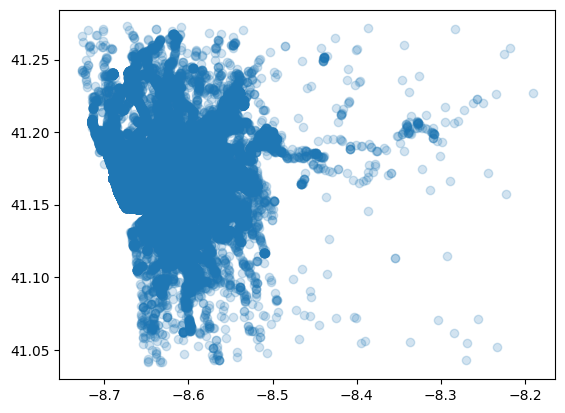

,TIMESTAMP,DAYOFYEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,HOUR,X,Y
count,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1703493.0,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,...,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06,1.703493e+06
mean,1.388621e+09,1.847333e+02,2.459842e+01,1.448541e+01,0.0,1.019281e+01,5.039615e+00,5.039615e+00,4.473669e+01,1.537826e+01,...,7.957482e+01,1.889756e+00,1.015507e+03,2.459842e+01,8.853043e+00,1.718303e+02,1.147330e+01,1.241975e+01,-8.617370e+00,4.115713e+01
std,9.179796e+06,1.043796e+02,6.236928e+00,5.020222e+00,0.0,3.044109e+00,1.201689e+00,1.201689e+00,3.125755e+01,4.384008e+00,...,8.286781e+00,4.645974e+00,5.156172e+00,6.236928e+00,1.316633e+00,6.957854e+01,4.020620e+00,6.240435e+00,2.527320e-02,1.306296e-02
min,1.372637e+09,1.000000e+00,9.000000e+00,1.000000e+00,0.0,3.800000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,...,5.300000e+01,0.000000e+00,1.002000e+03,9.000000e+00,4.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,-8.726634e+00,4.104122e+01
25%,1.380731e+09,9.600000e+01,2.100000e+01,1.100000e+01,0.0,8.700000e+00,4.000000e+00,4.000000e+00,1.600000e+01,1.300000e+01,...,7.500000e+01,0.000000e+00,1.011000e+03,2.100000e+01,8.000000e+00,1.090000e+02,9.000000e+00,7.900000e+00,-8.628831e+00,4.114787e+01
50%,1.388490e+09,1.820000e+02,2.500000e+01,1.500000e+01,0.0,1.150000e+01,5.000000e+00,5.000000e+00,4.300000e+01,1.600000e+01,...,8.000000e+01,0.000000e+00,1.015000e+03,2.500000e+01,9.000000e+00,1.680000e+02,1.100000e+01,1.260000e+01,-8.612739e+00,4.115436e+01
75%,1.396748e+09,2.760000e+02,2.900000e+01,1.800000e+01,0.0,1.300000e+01,6.000000e+00,6.000000e+00,7.200000e+01,1.900000e+01,...,8.500000e+01,1.200000e+00,1.019000e+03,2.900000e+01,1.000000e+01,2.290000e+02,1.400000e+01,1.738300e+01,-8.603613e+00,4.116320e+01
max,1.404173e+09,3.650000e+02,4.000000e+01,2.500000e+01,0.0,1.410000e+01,8.000000e+00,8.000000e+00,1.000000e+02,2.300000e+01,...,9.700000e+01,3.320000e+01,1.030000e+03,4.000000e+01,1.000000e+01,3.300000e+02,3.000000e+01,2.398300e+01,-8.190666e+00,4.127279e+01


In [19]:
from scipy import stats

def remove_outliers(df, col, threshold=3):
    z_scores = stats.zscore(df[col])
    abs_z_scores = abs(z_scores)
    return df[(abs_z_scores < threshold)]

data = remove_outliers(data, "X", 7)
data = remove_outliers(data, "Y", 7)

plt.scatter(data["X"], data["Y"], alpha=0.2)
plt.show()

data.describe()

In [41]:
bin_num = 5

data["X"] = pd.cut(data["X"], bin_num, labels=[i-1 for i in range(bin_num)])
data["Y"] = pd.cut(data["Y"], bin_num, labels=[i-1 for i in range(bin_num)])

In [42]:
def one_hot_encode_positions(positions):
    num_positions = len(positions)
    encoded_positions = np.zeros((num_positions, 25))  # 5x5 grid
    for i in range(num_positions):
        encoded_positions[i, positions["X"].iloc[i]*5 + positions["Y"].iloc[i]] = 1
    return encoded_positions

encoded_positions = one_hot_encode_positions(data[["X", "Y"]])

In [22]:
newpos = pd.DataFrame(encoded_positions)
data = pd.concat([data, newpos.set_axis(data.index)], axis=1)
data.head()

,TIMESTAMP,WEEKDAY,DAYOFYEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,...,15,16,17,18,19,20,21,22,23,24
0,1372636858,Monday,182,16,4,0.0,8.7,3,3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1372637303,Monday,182,16,4,0.0,8.7,3,3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1372636951,Monday,182,16,4,0.0,8.7,3,3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1372636854,Monday,182,16,4,0.0,8.7,3,3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1372637091,Monday,182,16,4,0.0,8.7,3,3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[["WEEKDAY"]]).toarray()
        column_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
    
        return X

In [45]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["X", "Y", "TIMESTAMP", "WEEKDAY", "totalSnow_cm", "uvIndex.1", "moon_illumination", "moonrise", "moonset", "sunrise", "sunset", "DewPointC", "WindChillC", "pressure", "tempC", "winddirDegree"], axis=1, errors="ignore")

In [46]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("featureencoder", FeatureEncoder()), ("featuredropper", FeatureDropper())])
data = pipeline.fit_transform(data)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop([i for i in range(25)], axis=1)
y = data[[i for i in range(25)]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras_tuner
from keras.metrics import TopKCategoricalAccuracy

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers", 3, 10)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])
            )
        )
        if hp.Boolean("dropout"):
            model.add(Dropout(rate=0.25))
    model.add(Dense(25, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-8, max_value=1e-5, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=[TopKCategoricalAccuracy(k=3)],
    )
    return model

In [49]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_top_k_categorical_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
)

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 19 Complete [00h 15m 58s]
val_top_k_categorical_accuracy: 0.9427001476287842

Best val_top_k_categorical_accuracy So Far: 0.9834164381027222
Total elapsed time: 06h 46m 40s

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
6                 |5                 |num_layers
352               |192               |units_0
relu              |relu              |activation
True              |True              |dropout
192               |256               |units_1
384               |32                |units_2
1.4551e-06        |8.8853e-07        |lr
352               |32                |units_3
288               |32                |units_4
352               |None              |units_5
64                |None              |units_6
448               |None              |units_7
256               |None              |units_8
480               |None              |units_9

Epoch 1/5
42588/42588 ━━━━━━━━━━━━━━━━━━━━ 152s 3ms/step - loss: 1.3835 - top_k_categorical_ac

In [30]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 96
activation: relu
dropout: False
lr: 5.685192206355545e-07
units_1: 32
Score: 0.5690726935863495

Trial 0 summary
Hyperparameters:
num_layers: 1
units_0: 64
activation: relu
dropout: True
lr: 5.432393324807729e-07
Score: 0.5527254343032837

Trial 1 summary
Hyperparameters:
num_layers: 1
units_0: 32
activation: tanh
dropout: True
lr: 3.3150374351149063e-07
Score: 0.21786973625421524
